In [20]:
import json
from pathlib import Path
from collections import defaultdict

import pandas as pd
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import PorterStemmer

In [8]:
rcParams['figure.figsize'] = (13, 7)

In [4]:
with open(Path.cwd().parent/'dataset/train.json') as f:
    data = json.load(f)

In [28]:
len(data)

1799

Посмотрим на длины предложений

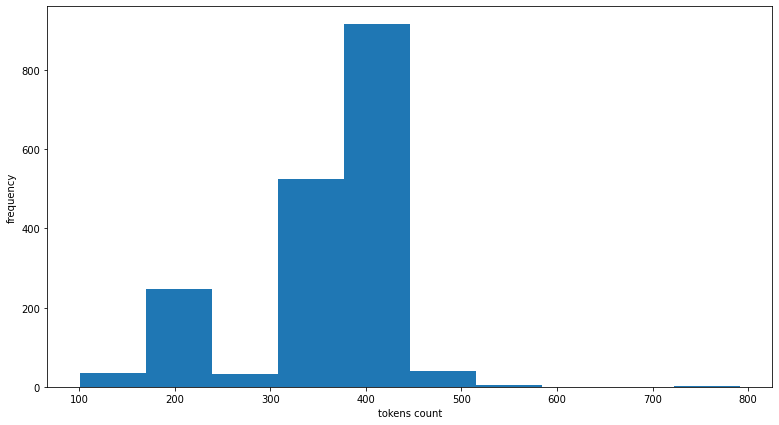

In [13]:
lengths = []
for item in data:
    lengths.append(len(wordpunct_tokenize(item['text'])))

_, ax = plt.subplots(1)
ax.hist(lengths)
ax.set_xlabel('tokens count')
ax.set_ylabel('frequency');

In [14]:
max(lengths)

791

Посмотрим на метки

In [24]:
labels = defaultdict(int)
for item in data:
    labels[item['label']] += 1

labels

defaultdict(int,
            {'обеспечение исполнения контракта': 988,
             'обеспечение гарантийных обязательств': 811})

Посмотрим на документы без указанного фрагмента

In [27]:
empty_parts = 0
for item in data:
    if not item['extracted_part']['text'][0]:
        empty_parts += 1

empty_parts

307

In [148]:
df_data = []
for item in data:
    df_data.append((item['label'], int(bool(item['extracted_part']['text'][0]))))

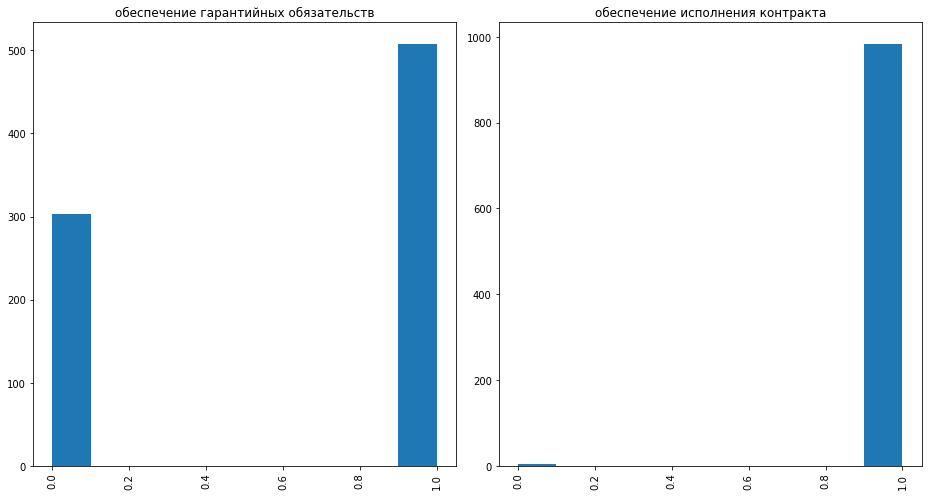

In [149]:
df = pd.DataFrame(df_data, columns=['label', 'is_empty'])
df.hist(by='label')
plt.tight_layout()